# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [ ]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [ ]:
dataframe = pd.read_csv("/content/stc TV Data Set_T2.csv",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
df=dataframe.copy()

df.head()

,date_,Total_watch_time_in_houres,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,2018-01-01 00:00:00,1123.551944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02 00:00:00,1000.129722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03 00:00:00,881.924444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04 00:00:00,782.669444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05 00:00:00,1051.939444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(axis=1)

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
# check the data shape
df.shape

(86, 2)

In [ ]:
# display the first 5 rows
df.head()

,date_,Total_watch_time_in_houres
0,2018-01-01 00:00:00,1123.551944
1,2018-01-02 00:00:00,1000.129722
2,2018-01-03 00:00:00,881.924444
3,2018-01-04 00:00:00,782.669444
4,2018-01-05 00:00:00,1051.939444


In [ ]:
# display the dataset after applying data types
df.head()

,date_,Total_watch_time_in_houres
0,2018-01-01 00:00:00,1123.551944
1,2018-01-02 00:00:00,1000.129722
2,2018-01-03 00:00:00,881.924444
3,2018-01-04 00:00:00,782.669444
4,2018-01-05 00:00:00,1051.939444


In [ ]:
# describe the numeric values in the dataset
df.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [ ]:
# check if any column has null value in the dataset
df.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [ ]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Setting the date as index
df.set_index('date_', inplace=True)

In [ ]:
# Display the dataframe after setting the date as index
df.head()

,Total_watch_time_in_houres
date_,
2018-01-01 00:00:00,1123.551944
2018-01-02 00:00:00,1000.129722
2018-01-03 00:00:00,881.924444
2018-01-04 00:00:00,782.669444
2018-01-05 00:00:00,1051.939444


In [ ]:
# show the dataframe
fig = px.line(df,  y="Total_watch_time_in_houres")
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Squared Error: 6211.438873626086


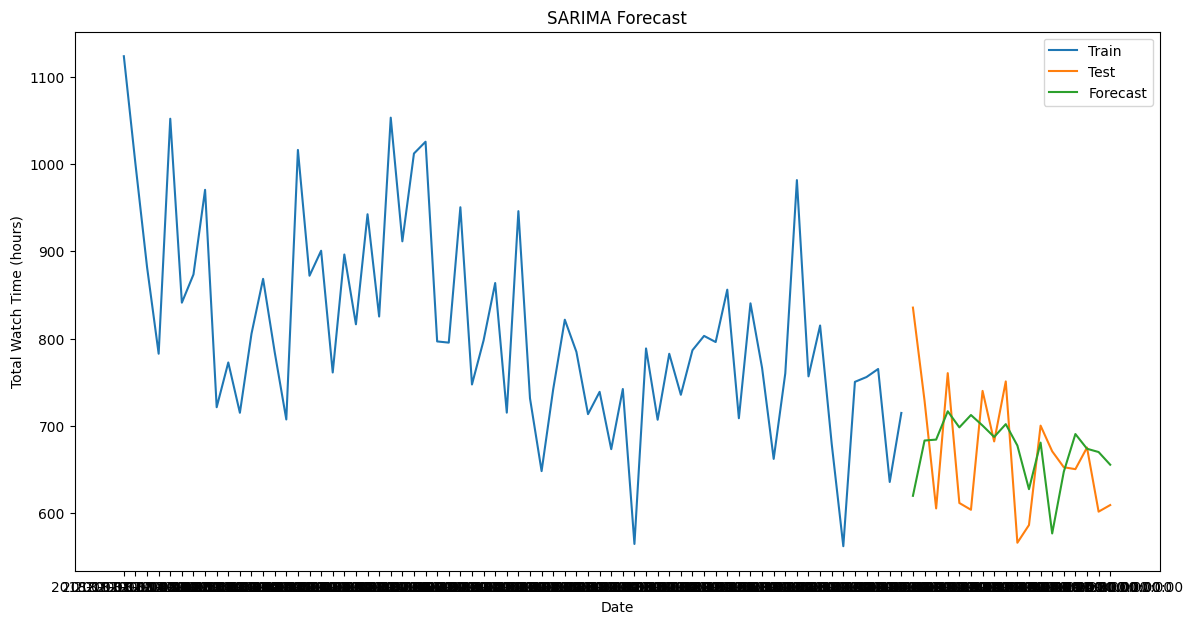

In [ ]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

# i used SARIMA model (Seasonal Autoregressive Integrated Moving Average)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with date and watch time columns
# You may need to preprocess the data and set the date column as the index

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train['Total_watch_time_in_houres'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test['Total_watch_time_in_houres'], forecast)
print('Mean Squared Error:', mse)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Total_watch_time_in_houres'], label='Train')
plt.plot(test.index, test['Total_watch_time_in_houres'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (hours)')
plt.legend()
plt.show()
